# OpenCV - Basics
Some basic tests of OpenCV functionality.

Be sure to install the package with both main and contrib modules:

pip install opencv-contrib-python

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## IO

In [26]:
image = cv2.imread("cup.jpg")
print(image.shape)
height, width = image.shape[:2] # or
height, width, channels = image.shape

(480, 640, 3)


Show the image. Note that OpenCV stores images in BGR whereas matplotlib needs RGB format, so we will need to convert for correct display

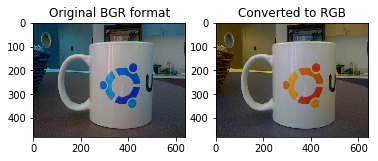

In [27]:
RGB_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.subplot(121);
plt.imshow(image) # expects distorted color
plt.title('Original BGR format')
plt.subplot(122);
plt.imshow(RGB_image) # expect true color
plt.title('Converted to RGB')
plt.show()

Convert to grey scale and plot. Note that we need to specify the colormap as the converted image is a 2D matrix with "luminosity" values

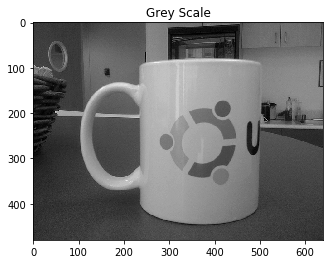

In [28]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap="gray")
plt.title('Grey Scale')
plt.show()

By default, the imread function reads images in the BGR (Blue-Green-Red) format. We can read images in different formats using extra flags in the imread function:

* cv2.IMREAD_COLOR: Default flag for loading a color image
* cv2.IMREAD_GRAYSCALE: Loads images in grayscale format
* cv2.IMREAD_UNCHANGED: Loads images in their given format, including the alpha channel. Alpha channel stores the transparency information – the higher the value of alpha channel, the more opaque is the pixel

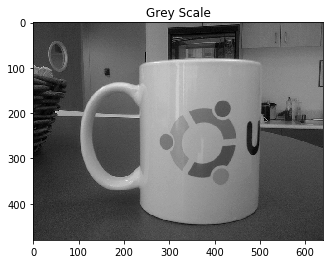

In [29]:
gray_image = cv2.imread("cup.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(gray_image, cmap="gray")
plt.title('Grey Scale')
plt.show()

## Access and manipulate pixels
We can access pixels directly in the numpy array. Note that for individual pixels this can be slow so consider using item() and itemset() e.g. img.item(10,10,2)

In [30]:
pixel = RGB_image[100,100]
print(pixel)
red = RGB_image[100,100,0]
print(red)
RGB_image[100,100] = [255,255,255]
print(pixel)

[70 57  2]
70
[255 255 255]


In [31]:
red = RGB_image.item(100,100,0)
print(red)
RGB_image.itemset(100,100,0,100)
red = RGB_image.item(100,100,0)
print(red)

255
100


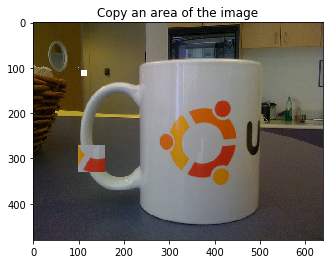

In [32]:
RGB_image[105:120,105:120] = [255,255,255]

copied_area = RGB_image[280:340, 330:390]
RGB_image[270:330, 100:160] = copied_area
plt.imshow(RGB_image) # expect true color
plt.title('Copy an area of the image')
plt.show()

# Different Color Spaces
We have already seen RGB and BGR, but we can also convert to others such as HSV. In HSV color space the color and intensity information are separated from each other which makes it more robust to lighting changes.

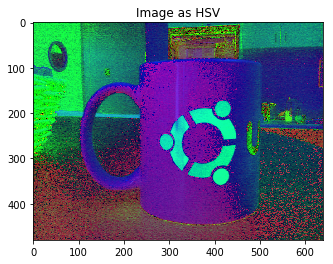

In [33]:
#converting image to HSV format
hsv_image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
plt.imshow(hsv_image)
plt.title('Image as HSV')
plt.show()

# Resizing Images
Different interpolation and downsampling methods are supported by OpenCV, which can be used by the following parameters:

* INTER_NEAREST: Nearest neighbor interpolation
* INTER_LINEAR: Bilinear interpolation
* INTER_AREA: Resampling using pixel area relation
* INTER_CUBIC: Bicubic interpolation over 4×4 pixel neighborhood
* INTER_LANCZOS4: Lanczos interpolation over 8×8 neighborhood

OpenCV’s resize function uses bilinear interpolation by default. We can scale to a specified size or by a scaling factor where fx is the scaling factor along the horizontal axis and fy along the vertical axis.

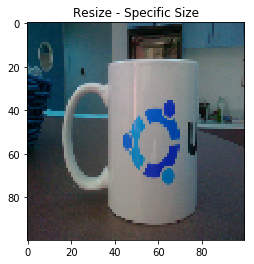

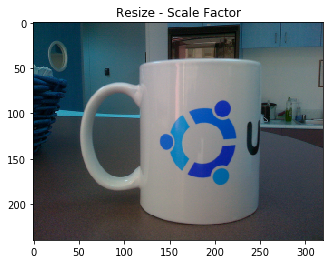

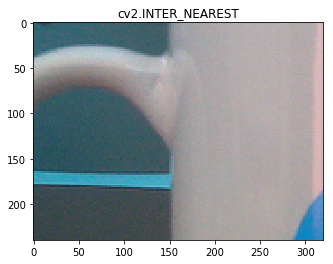

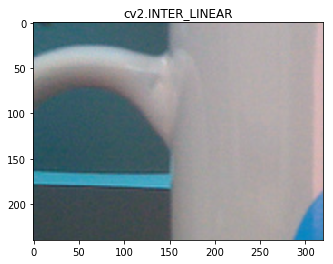

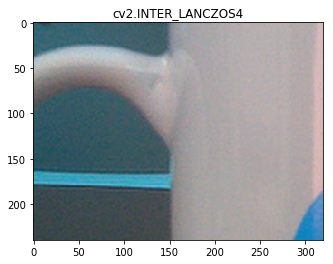

In [34]:
# resize by specific size
smaller_image = cv2.resize(image,(100, 100)) 
plt.imshow(smaller_image)
plt.title('Resize - Specific Size')
plt.show()

# resize by factor
smaller_image = cv2.resize(image, None, fx=0.5, fy=0.5)
plt.imshow(smaller_image)
plt.title('Resize - Scale Factor')
plt.show()

for interpolation in [(cv2.INTER_NEAREST, "cv2.INTER_NEAREST"), 
                      (cv2.INTER_LINEAR, "cv2.INTER_LINEAR"),
                      (cv2.INTER_LANCZOS4, "cv2.INTER_LANCZOS4")]:
    smaller_image = cv2.resize(image,(width * 2, height * 2),interpolation = interpolation[0]) 
    plt.imshow(smaller_image[int(height/2):int(height), int(width/2):int(width)])
    plt.title(interpolation[1])
    plt.show()

# Rotation

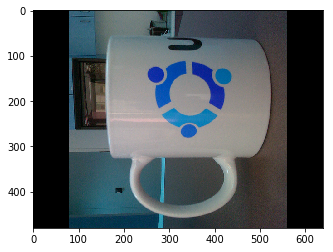

In [35]:
#(width/2,height/2) is the center of rotation for the image 
# M is the cordinates of the center 
M = cv2.getRotationMatrix2D((width/2,height/2),90,1) 
rotated = cv2.warpAffine(image,M,(width,height)) 
plt.imshow(rotated)

# Image Translation
Image translation is a geometric transformation that maps the position of every object in the image to a new location in the final output image. 

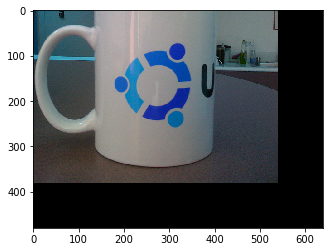

In [36]:
#shifting the image 100 pixels in both dimensions
M = np.float32([[1,0,-100],[0,1,-100]]) 
dst = cv2.warpAffine(image,M,(width,height)) 
plt.imshow(dst)

# Thresholding
Thresholding is an image segmentation method. It compares pixel values with a threshold value and updates it accordingly. OpenCV supports multiple variations of thresholding with the simplest and most widely known being to just create a mask where the output is 1 for values above a threshold, or 0 otherwise.

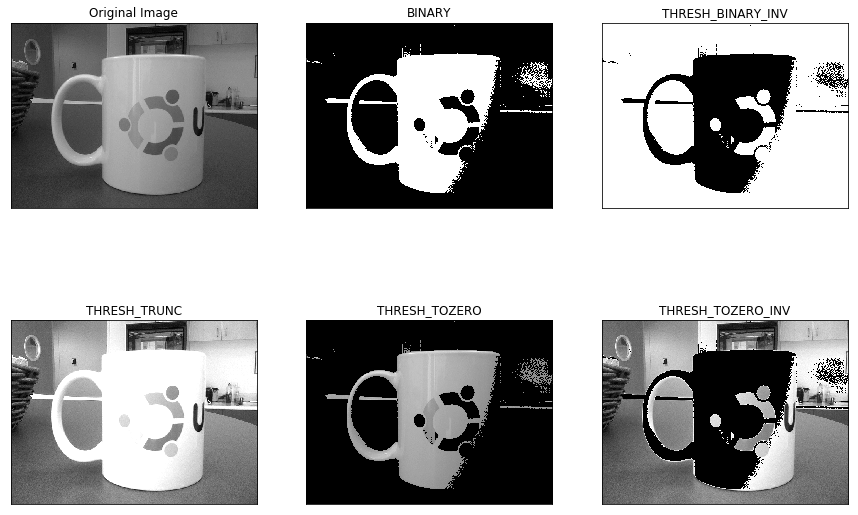

In [37]:
ret,thresh_binary = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
ret,thresh_binary_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY_INV)
ret,thresh_trunc = cv2.threshold(gray_image,127,255,cv2.THRESH_TRUNC)
ret,thresh_tozero = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO)
ret,thresh_tozero_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO_INV)

# DISPLAYING THE DIFFERENT THRESHOLDING STYLES
names = ['Original Image','BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
images = gray_image,thresh_binary,thresh_binary_inv,thresh_trunc,thresh_tozero,thresh_tozero_inv

plt.figure(figsize=(15,10))

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

# Adaptive Thresholding
In case of adaptive thresholding, different threshold values are used for different parts of the image. This function gives better results for images with varying lighting conditions – hence the term “adaptive”.

Otsu’s binarization method finds an optimal threshold value for the whole image. It works well for bimodal images (images with 2 peaks in their histogram

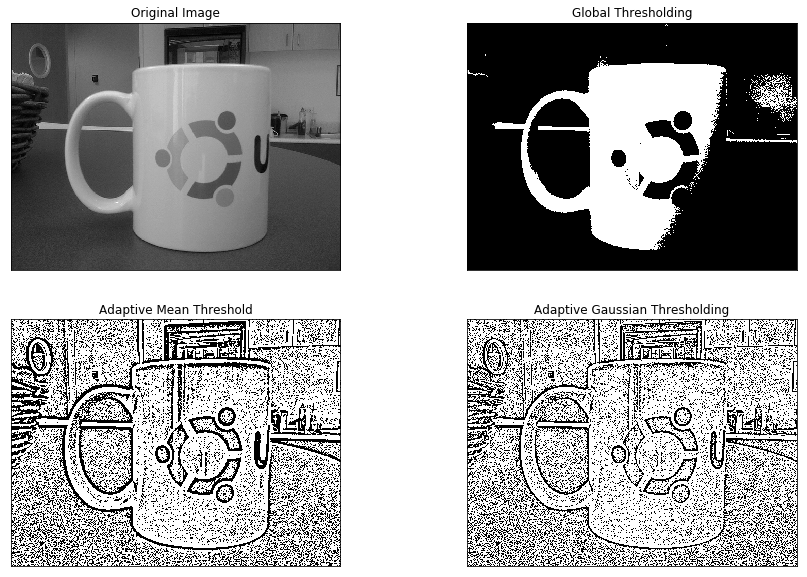

In [38]:
ret,thresh_global = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
#here 11 is the pixel neighbourhood that is used to calculate the threshold value
thresh_mean = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
thresh_gaussian = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

names = ['Original Image','Global Thresholding','Adaptive Mean Threshold','Adaptive Gaussian Thresholding']
images = [gray_image,thresh_global,thresh_mean,thresh_gaussian]

plt.figure(figsize=(15,10))

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

## Image Segmentation (Watershed Algorithm)
Image segmentation is the task of classifying every pixel in the image to some class. For example, classifying every pixel as foreground or background. Image segmentation is important for extracting the relevant parts from an image.

The watershed algorithm is a classic image segmentation algorithm. It considers the pixel values in an image as topography. For finding the object boundaries, it takes initial markers as input. The algorithm then starts flooding the basin from the markers till the markers meet at the object boundaries.

Let’s say we have a topography with multiple basins. Now, if we fill different basins with water of different color, then the intersection of different colors will give us the object boundaries. This is the intuition behind the watershed algorithm.

In [39]:
##reading the image
#image = cv2.imread('green_screen.png')
#plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
#plt.show()

##converting image to grayscale format
#gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

##apply thresholding
#ret,thresh = cv2.threshold(gray_image,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#plt.imshow(thresh)
#plt.show()

##get a kernel
#kernel = np.ones((3,3),np.uint8)
#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations = 2)
#extract the background from image
#sure_bg = cv2.dilate(opening,kernel,iterations = 3)
#plt.imshow(sure_bg)
#plt.show()

#dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
#ret,sure_fg = cv2.threshold(dist_transform,0.01*dist_transform.max(),255,0)

#sure_fg = np.uint8(sure_fg)
#unknown = cv2.subtract(sure_bg,sure_bg)

#ret,markers = cv2.connectedComponents(sure_fg)

#markers = markers+1

#markers[unknown==255] = 0

#markers = cv2.watershed(image,markers)
#image[markers==-1] = [255,0,0]

#plt.imshow(sure_fg)
#plt.show()

# Bitwise Operations
Bitwise operations include AND, OR, NOT and XOR. You might remember them from your programming class! In computer vision, these operations are very useful when we have a mask image and want to apply that mask over another image to extract the region of interest.

In [40]:
##apply thresholdin 
#ret,mask = cv2.threshold(image,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) 
##apply AND operation on image and mask generated by thrresholding
#final = cv2.bitwise_and(image,image,mask = mask) 
##plot the result
#plt.imshow(final)

# Edge Detection
Edges are the points in an image where the image brightness changes sharply or has discontinuities. Such discontinuities generally correspond to:

* Discontinuities in depth
* Discontinuities in surface orientation
* Changes in material properties
* Variations in scene illumination

Edges are very useful features of an image that can be used for different applications like classification of objects in the image and localization. Even deep learning models calculate edge features to extract information about the objects present in image.

Edges are different from contours as they are not related to objects rather they signify the changes in pixel values of an image. Edge detection can be used for image segmentation and even for image sharpening.

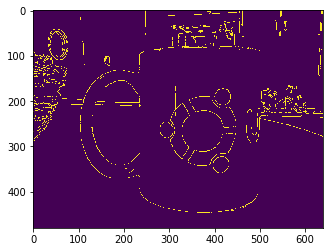

In [41]:
#calculate the edges using Canny edge algorithm
edges = cv2.Canny(image,100,200) 
#plot the edges
plt.imshow(edges)

# Image Filtering
In image filtering, a pixel value is updated using its neighbouring values. But how are these values updated in the first place?

Well, there are multiple ways of updating pixel values, such as selecting the maximum value from neighbours, using the average of neighbours, etc. Each method has it’s own uses. For example, averaging the pixel values in a neighbourhood is used for image blurring.

Gaussian filtering is also used for image blurring that gives different weights to the neighbouring pixels based on their distance from the pixel under consideration.

For image filtering, we use kernels. Kernels are matrices of numbers of different shapes like 3 x 3, 5 x 5, etc. A kernel is used to calculate the dot product with a part of the image. When calculating the new value of a pixel, the kernel center is overlapped with the pixel. The neighbouring pixel values are multiplied with the corresponding values in the kernel. The calculated value is assigned to the pixel coinciding with the center of the kernel.

In [42]:
#using the averaging kernel for image smoothening 
averaging_kernel = np.ones((3,3),np.float32)/9 
filtered_image = cv2.filter2D(image,-1,kernel) 
plt.imshow(dst) 
#get a one dimensional Gaussian Kernel 
gaussian_kernel_x = cv2.getGaussianKernel(5,1) 
gaussian_kernel_y = cv2.getGaussianKernel(5,1) 
#converting to two dimensional kernel using matrix multiplication 
gaussian_kernel = gaussian_kernel_x * gaussian_kernel_y.T 
#you can also use cv2.GaussianBLurring(image,(shape of kernel),standard deviation) instead of cv2.filter2D 
filtered_image = cv2.filter2D(image,-1,gaussian_kernel) 
plt.imshow(filtered_image)

NameError: name 'kernel' is not defined

# Image Contours
A contour is a closed curve of points or line segments that represents the boundaries of an object in the image. Contours are essentially the shapes of objects in an image.

Unlike edges, contours are not part of an image. Instead, they are an abstract collection of points and line segments corresponding to the shapes of the object(s) in the image.

We can use contours to count the number of objects in an image, categorize objects on the basis of their shapes, or select objects of particular shapes from the image.

In [ ]:
shapes_image = cv2.imread('shapes.jpg') 
shapes_gray_image = cv2.cvtColor(shapes_image,cv2.COLOR_BGR2GRAY) 

#converting RGB image to Binary 
ret,thresh = cv2.threshold(shapes_gray_image,127,255,0) 

#calculate the contours from binary image
im,contours = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = np.array(contours).reshape((-1,1,2))
with_contours = cv2.drawContours(shapes_image,contours,-1,(0,255,0),3) 
plt.imshow(with_contours)

# Scale Invariant Feature Transform (SIFT)
Keypoints is a concept you should be aware of when working with images. These are basically the points of interest in an image. Keypoints are analogous to the features of a given image.

They are locations that define what is interesting in the image. Keypoints are important, because no matter how the image is modified (rotation, shrinking, expanding, distortion), we will always find the same keypoints for the image.

Scale Invariant Feature Transform (SIFT) is a very popular keypoint detection algorithm. It consists of the following steps:

Scale-space extrema detection
Keypoint localization
Orientation assignment
Keypoint descriptor
Keypoint matching
Features extracted from SIFT can be used for applications like image stitching, object detection, etc. The below code and output show the keypoints and their orientation calculated using SIFT.

NOTE: SIFT is patented and so the below needs a custom build of OpenCV with OPENCV_ENABLE_NONFREE set.

In [ ]:
#create sift object
sift  = cv2.xfeatures2d.SIFT_create()
#calculate keypoints and their orientation
keypoints,descriptors = sift.detectAndCompute(gray_image,None)
#plot keypoints on the image
with_keypoints = cv2.drawKeypoints(gray_image,keypoints)
#plot the image
plt.imshow(with_keypoints)

# Speeded-Up Robust Features (SURF)
Speeded-Up Robust Features (SURF) is an enhanced version of SIFT. It works much faster and is more robust to image transformations. In SIFT, the scale space is approximated using Laplacian of Gaussian. Wait – that sounds too complex. What is Laplacian of Gaussian?

Laplacian is a kernel used for calculating the edges in an image. The Laplacian kernel works by approximating a second derivative of the image. Hence, it is very sensitive to noise. We generally apply the Gaussian kernel to the image before Laplacian kernel thus giving it the name Laplacian of Gaussian.

In SURF, the Laplacian of Gaussian is calculated using a box filter (kernel). The convolution with box filter can be done in parallel for different scales which is the underlying reason for the enhanced speed of SURF (compared to SIFT). There are other neat improvements like this in SURF – I suggest going through the research paper to understand this in-depth.

In [ ]:
#instantiate surf object
surf  = cv2.xfeatures2d.SURF_create(400)
#calculate keypoints and their orientation
keypoints,descriptors = surf.detectAndCompute(gray_image,None)

with_keypoints = cv2.drawKeypoints(gray_image,keypoints)

plt.imshow(with_keypoints)

# Feature Matching
The features extracted from different images using SIFT or SURF can be matched to find similar objects/patterns present in different images. The OpenCV library supports multiple feature-matching algorithms, like brute force matching, knn feature matching, among others.

In [ ]:
#reading images in grayscale format
image1 = cv2.imread('messi.jpg',0)
image2 = cv2.imread('team.jpg',0)

#finding out the keypoints and their descriptors
keypoints1,descriptors1 = cv2.detectAndCompute(image1,None)
keypoints2,descriptors2 = cv2.detectAndCompute(image2,None)

#matching the descriptors from both the images 
bf = cv2.BFMatcher()
matches = bf.knnMatch(ds1,ds2,k = 2)

#selecting only the good features
good_matches = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

image3 = cv2.drawMatchesKnn(image1,kp1,image2,kp2,good,flags = 2)

# Face Detection
OpenCV supports haar cascade based object detection. Haar cascades are machine learning based classifiers that calculate different features like edges, lines, etc in the image. Then, these classifiers train using multiple positive and negative samples.

Trained classifiers for different objects like faces,eyes etc are available in the OpenCV Github repo , you can also train your own haar cascade for any object.

In [ ]:
#load the classifiers downloaded 
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
#read the image and convert to grayscale format
img = cv2.imread('face.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#calculate coordinates 
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    #draw bounding boxes around detected features
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
#plot the image
plt.imshow(img)